In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
training_set = dataset_train.iloc[:, 1:2].values

Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

Create a data structure with 60 timesteps and 1 output

In [6]:
X_train = []
Y_train = []
for i in range(60,1258):
        X_train.append(training_set_scaled[i-60:i,0])
        Y_train.append(training_set_scaled[i,0])

In [7]:
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [8]:
X_train,Y_train 

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]]),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

Reshaping - Add dimension incase we want to add more dimensionality later

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

# Building RNN 

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [11]:
RNN = Sequential()

1st LSTM Layer and Dropout Regularization

In [12]:
RNN.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
RNN.add(Dropout(0.2))

2nd LSTM Layer and Dropout Regularization

In [13]:
RNN.add(LSTM(units = 50, return_sequences = True))
RNN.add(Dropout(0.2))

3rd LSTM Layer and Dropout Regularization

In [14]:
RNN.add(LSTM(units = 50, return_sequences = True))
RNN.add(Dropout(0.2))

4th LSTM Layer and Dropout Regularization

In [15]:
RNN.add(LSTM(units = 50))
RNN.add(Dropout(0.2))

Output Layer

In [16]:
RNN.add(Dense(units = 1))

In [17]:
RNN.compile(optimizer = 'adam', loss = 'mean_squared_error')

No Convergence in 25, 50 epochs. 

In [18]:
RNN.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 43ms/step - loss: 0.0432
Epoch 2/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

# Prediction

In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
actual_stock_price = dataset_test.iloc[:, 1:2].values

Prepare inputs for prediction

In [23]:
Prediction_input = pd.concat((dataset_train["Open"],dataset_test["Open"]), axis = 0)
inputs = Prediction_input[len(Prediction_input) - len(dataset_test) - 60:].values

In [24]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [25]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [26]:
inputs = sc.transform(inputs)

In [27]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [28]:
predicted_stock_price = RNN.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 927ms/step


Visualizing Results

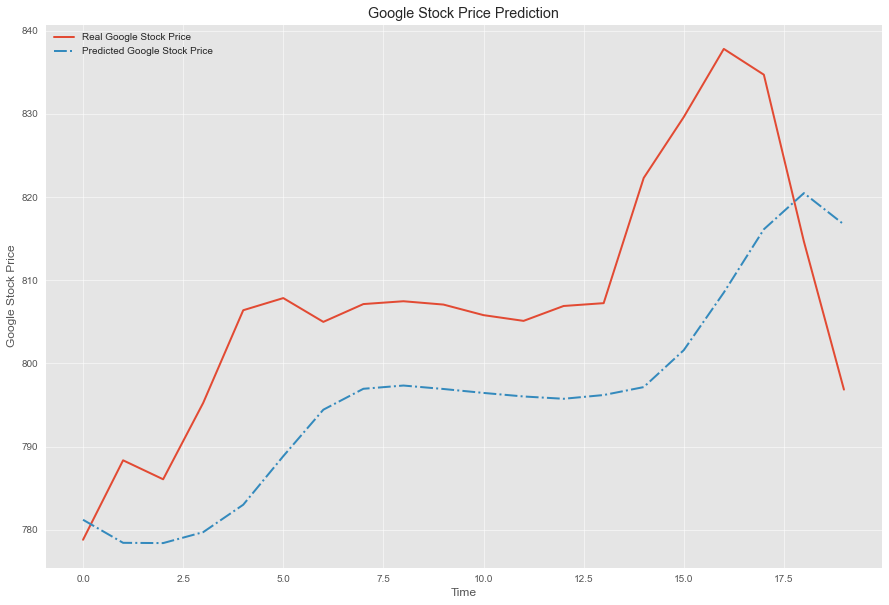

In [46]:
plt.figure(figsize=(15,10))
plt.plot(actual_stock_price, label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, ls = "-.", label = 'Predicted Google Stock Price')
plt.style.use('ggplot')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

+ Lagging - Model doesn't react fast to non-linear changes(spikes) - Based on Brownian Motion.
+ Model follows smooth changes(upward/downward/stable) properly.